In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [75]:
df = pd.read_csv('../Resources/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', delimiter=';')
df.head(5)

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

In [77]:
df[df.isnull().any(axis=1)]

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305429,1800291,01.01.2019 09:28,01.01.2019,09:28,31.12.2018 19:41,31.12.2018,19:41,"76,906","12,709",21.0,...,Gråsteinbit,304.0,Steinbiter,145.0,5.0,28 m og over,1483.0,NaN,"12,6","57,3"
305430,1800291,01.01.2019 09:28,01.01.2019,09:28,31.12.2018 19:41,31.12.2018,19:41,"76,906","12,709",21.0,...,Uer (vanlig),302.0,Uer,136.0,5.0,28 m og over,1483.0,NaN,"12,6","57,3"
305431,1800291,01.01.2019 09:28,01.01.2019,09:28,31.12.2018 19:41,31.12.2018,19:41,"76,906","12,709",21.0,...,Flekksteinbit,304.0,Steinbiter,132.0,5.0,28 m og over,1483.0,NaN,"12,6","57,3"
305432,1800291,01.01.2019 09:28,01.01.2019,09:28,31.12.2018 19:41,31.12.2018,19:41,"76,906","12,709",21.0,...,Snabeluer,302.0,Uer,102.0,5.0,28 m og over,1483.0,NaN,"12,6","57,3"


In [78]:
print(df.isnull().sum())

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

In [79]:
df = df.dropna()
df

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
1947,1498969,04.01.2018 23:39,04.01.2018,23:39,04.01.2018 06:23,04.01.2018,06:23,"71,795","27,459",3.0,...,Torsk,201.0,Torsk,990.0,5.0,28 m og over,527.0,299.0,"9,24","45,42"
2833,1499661,06.01.2018 06:09,06.01.2018,06:09,04.01.2018 21:09,04.01.2018,21:09,"73,758","29,097",20.0,...,Torsk,201.0,Torsk,2475.0,5.0,28 m og over,527.0,299.0,"9,24","45,42"
2834,1499661,06.01.2018 06:09,06.01.2018,06:09,05.01.2018 03:34,05.01.2018,03:34,"73,859","30,1",13.0,...,Torsk,201.0,Torsk,3465.0,5.0,28 m og over,527.0,299.0,"9,24","45,42"
2835,1499661,06.01.2018 06:09,06.01.2018,06:09,05.01.2018 03:34,05.01.2018,03:34,"73,859","30,1",13.0,...,Hyse,202.0,Hyse,353.0,5.0,28 m og over,527.0,299.0,"9,24","45,42"
2836,1499661,06.01.2018 06:09,06.01.2018,06:09,05.01.2018 10:05,05.01.2018,10:05,"73,903","29,836",20.0,...,Torsk,201.0,Torsk,1980.0,5.0,28 m og over,527.0,299.0,"9,24","45,42"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305359,1800266,31.12.2018 23:38,31.12.2018,23:38,31.12.2018 00:01,31.12.2018,00:01,"72,652","28,205",12.0,...,Hyse,202.0,Hyse,2134.0,5.0,28 m og over,457.0,222.0,"7,6",38
305360,1800266,31.12.2018 23:38,31.12.2018,23:38,31.12.2018 00:01,31.12.2018,00:01,"72,652","28,205",12.0,...,Blåsteinbit,304.0,Steinbiter,1270.0,5.0,28 m og over,457.0,222.0,"7,6",38
305361,1800266,31.12.2018 23:38,31.12.2018,23:38,31.12.2018 00:01,31.12.2018,00:01,"72,652","28,205",12.0,...,Flekksteinbit,304.0,Steinbiter,437.0,5.0,28 m og over,457.0,222.0,"7,6",38
305362,1800266,31.12.2018 23:38,31.12.2018,23:38,31.12.2018 00:01,31.12.2018,00:01,"72,652","28,205",12.0,...,Brosme,220.0,Annen torskefisk,175.0,5.0,28 m og over,457.0,222.0,"7,6",38


The dataset contains several columns which are unnecessary for our purpose. This includes the message report metadata, as well as duplicate columns which represents the same information in codes instead of words.

Let's remove these columns.

In [80]:
df = df[[
    'Starttidspunkt','Startposisjon bredde', 'Startposisjon lengde', 'Hovedområde start',
    'Havdybde start', 'Stopptidspunkt', 'Varighet', 'Fangstår', 'Stopposisjon bredde', 
    'Stopposisjon lengde', 'Hovedområde stopp', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR',
    'Hovedart FAO', 'Art FAO', 'Art - gruppe', 'Rundvekt', 'Bruttotonnasje annen', 
    'Bruttotonnasje 1969', 'Bredde', 'Fartøylengde'
    ]].copy()

As we noticed above, several of the datatypes which are supposed to be continuous floats are interpreted as objects. This is likely because the numbers are all using comma as decimal seperator, which is the standard representation in Norway. There are also several date and time object columns which needs to be converted to datetime.

In [81]:
df.dtypes

Starttidspunkt           object
Startposisjon bredde     object
Startposisjon lengde     object
Hovedområde start        object
Havdybde start            int64
Stopptidspunkt           object
Varighet                  int64
Fangstår                  int64
Stopposisjon bredde      object
Stopposisjon lengde      object
Hovedområde stopp        object
Havdybde stopp            int64
Trekkavstand            float64
Redskap FDIR             object
Hovedart FAO             object
Art FAO                  object
Art - gruppe             object
Rundvekt                float64
Bruttotonnasje annen    float64
Bruttotonnasje 1969     float64
Bredde                   object
Fartøylengde             object
dtype: object

In [82]:
df['Starttidspunkt'] = pd.to_datetime(df['Starttidspunkt'], format='mixed')
df['Stopptidspunkt'] = pd.to_datetime(df['Stopptidspunkt'], format='mixed')

df['Fartøylengde'] = pd.to_numeric(df['Fartøylengde'].str.replace(',', '.'))
df['Bredde'] = pd.to_numeric(df['Bredde'].str.replace(',', '.'))

df['Startposisjon bredde'] = pd.to_numeric(df['Startposisjon bredde'].str.replace(',', '.'))
df['Startposisjon lengde'] = pd.to_numeric(df['Startposisjon lengde'].str.replace(',', '.'))

In [83]:
df.head()

,Starttidspunkt,Startposisjon bredde,Startposisjon lengde,Hovedområde start,Havdybde start,Stopptidspunkt,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,...,Trekkavstand,Redskap FDIR,Hovedart FAO,Art FAO,Art - gruppe,Rundvekt,Bruttotonnasje annen,Bruttotonnasje 1969,Bredde,Fartøylengde
1947,2018-04-01 06:23:00,71.795,27.459,Øst-Finnmark,-320,2018-04-01 09:41:00,198,2018,"71,734","27,434",...,6862.0,Bunntrål,Torsk,Torsk,Torsk,990.0,299.0,527.0,9.24,45.42
2833,2018-04-01 21:09:00,73.758,29.097,Bjørnøya,-367,2018-05-01 02:12:00,303,2018,"73,884","29,883",...,28210.0,Bunntrål,Torsk,Torsk,Torsk,2475.0,299.0,527.0,9.24,45.42
2834,2018-05-01 03:34:00,73.859,30.100,Thor Iversens Bank,-341,2018-05-01 09:09:00,335,2018,"73,887","30,023",...,3933.0,Bunntrål,Torsk,Torsk,Torsk,3465.0,299.0,527.0,9.24,45.42
2835,2018-05-01 03:34:00,73.859,30.100,Thor Iversens Bank,-341,2018-05-01 09:09:00,335,2018,"73,887","30,023",...,3933.0,Bunntrål,Torsk,Hyse,Hyse,353.0,299.0,527.0,9.24,45.42
2836,2018-05-01 10:05:00,73.903,29.836,Bjørnøya,-352,2018-05-01 13:14:00,189,2018,"73,874","30,051",...,7407.0,Bunntrål,Torsk,Torsk,Torsk,1980.0,299.0,527.0,9.24,45.42


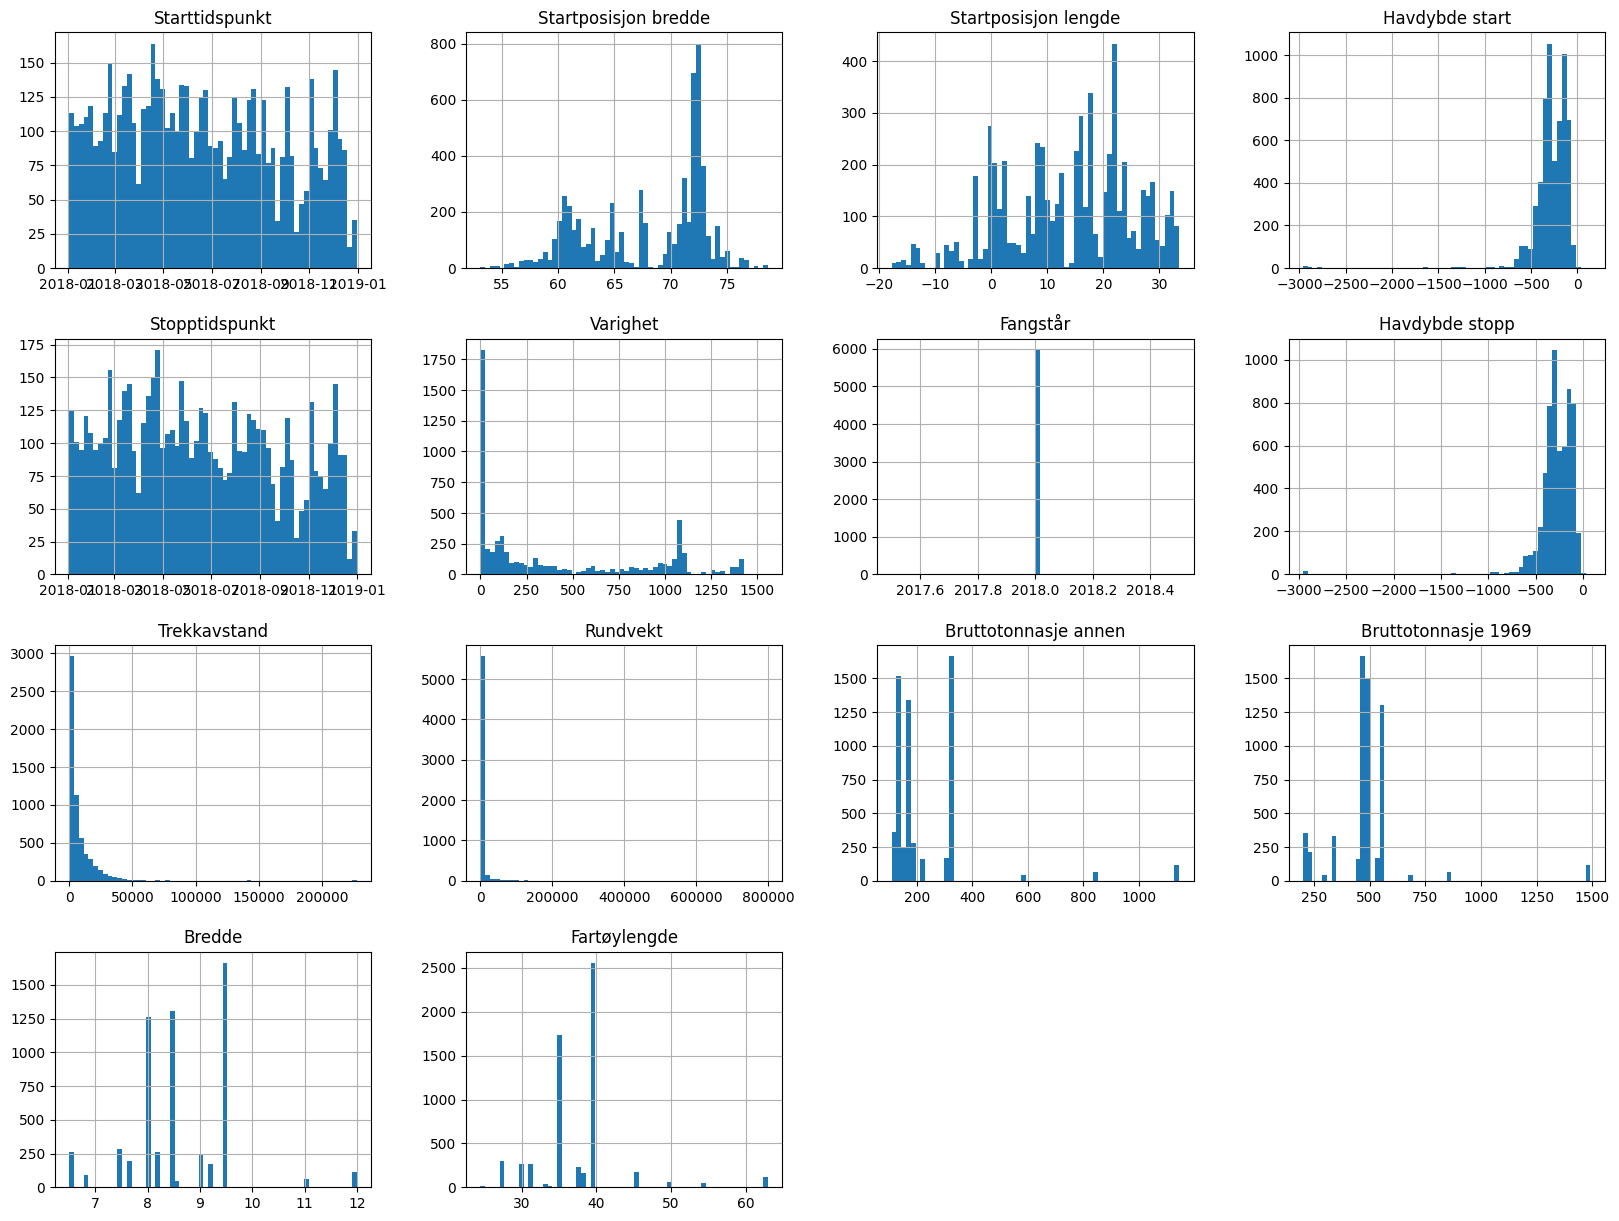

In [84]:
df.hist(bins=60, figsize=(20,15));plt.show()

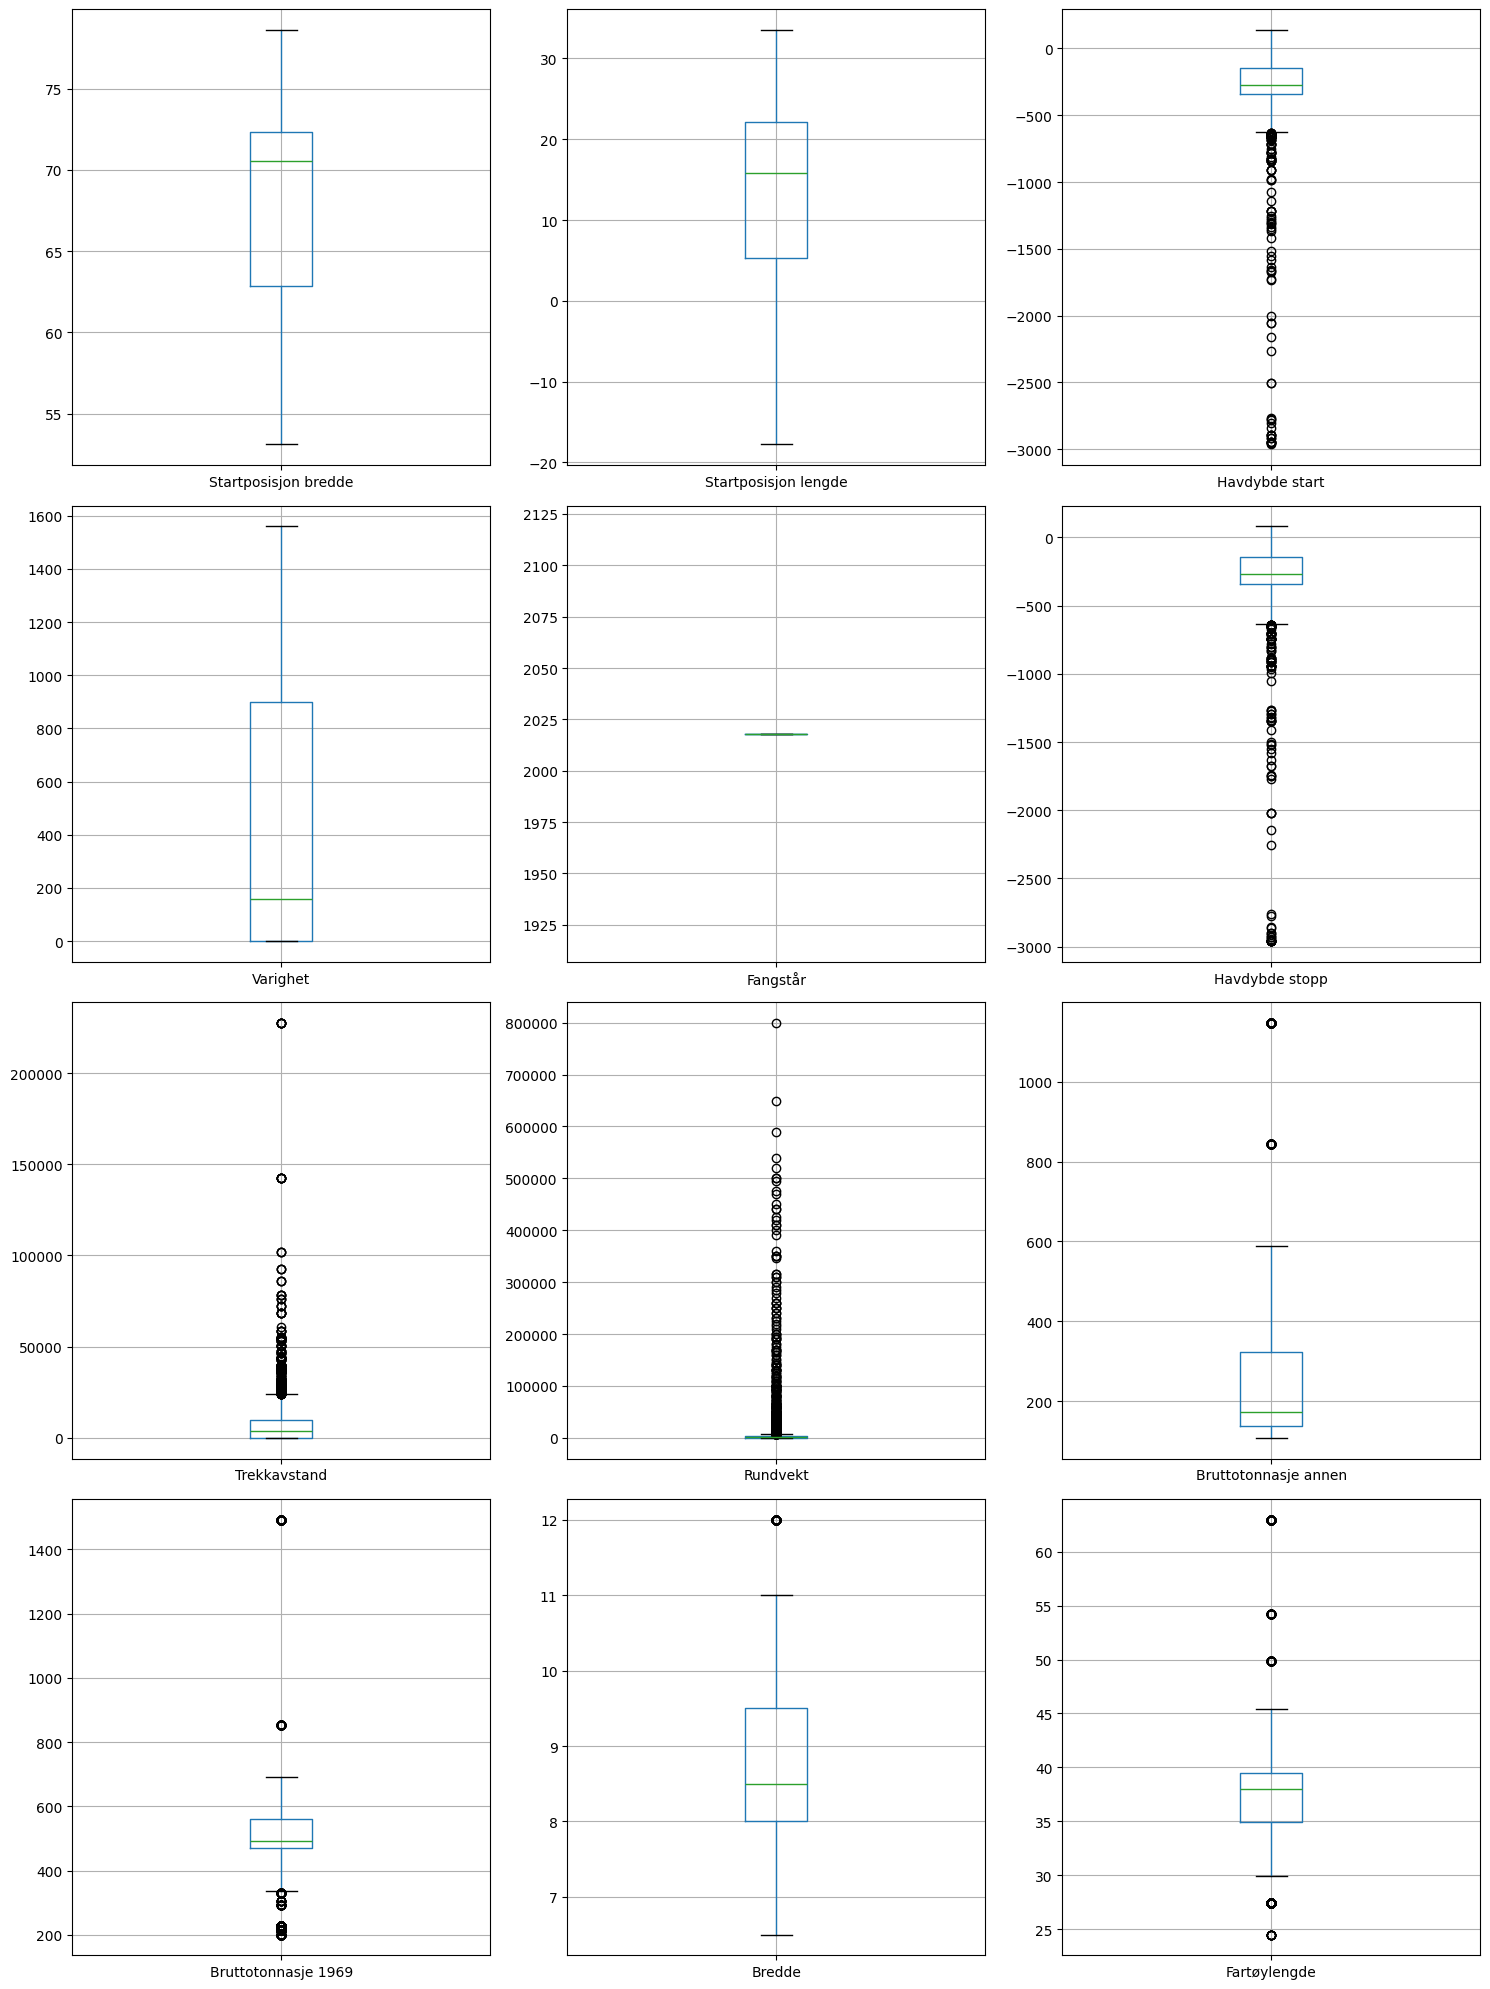

In [85]:
num_cols = df.select_dtypes(include=['number']).columns  # Velger kun numeriske kolonner
num_of_columns = len(num_cols)
# Bestem antall rader og kolonner for subplot gridet
num_of_rows = int(np.ceil(num_of_columns / 3))  # Anta at vi ønsker maks 3 kolonner
fig, axes = plt.subplots(nrows=num_of_rows, ncols=3, figsize=(15, num_of_rows * 5))  # Tilpasser størrelsen etter behov

# Flater ut axes array for enkel iterasjon
axes = axes.flatten()

for i, col in enumerate(num_cols):
    df.boxplot(column=col, ax=axes[i])

# Skjul tomme subplots hvis antall kolonner ikke er et multippel av 3
for i in range(num_of_columns, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # For å sørge for at det ikke er overlapping mellom subplot
plt.show()

In [86]:
import seaborn as sns

In [ ]:
features = ['Rundvekt', 'Fartøylengde']  # Liste over features du vil plotte
num_features = len(features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, num_features * 4))  # Juster størrelsen etter behov

for i, feature in enumerate(features):
    # Lag et heatmap for hver feature
    sns.heatmap(data=df.pivot_table(index='Startposisjon bredde', columns='Startposisjon lengde', values=feature, aggfunc='mean').fillna(0), ax=axes[i])
    axes[i].set_title(f"Heatmap for {feature}")

plt.tight_layout()
plt.show()